<a href="https://colab.research.google.com/github/ixvqc/praca-magisterska/blob/main/LightGBMGXT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7906

Recall: 0.5321

Precision: 0.6238

F1-score: 0.5743

AUROC: 0.8295



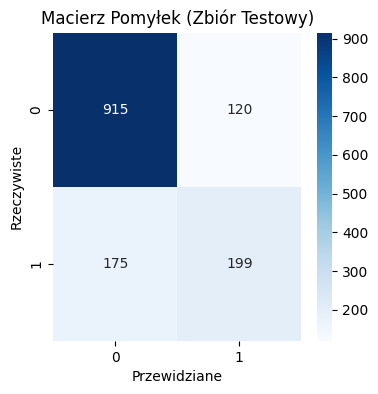

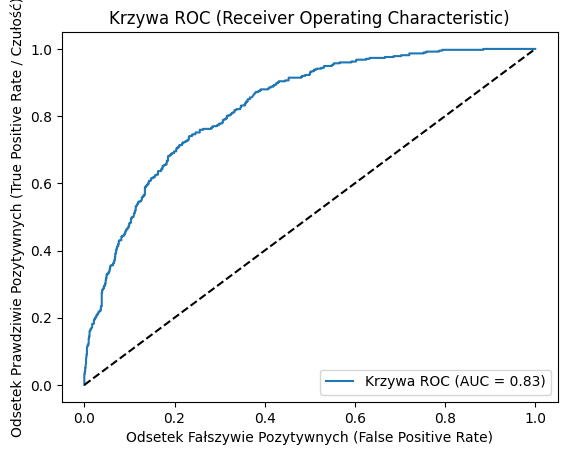

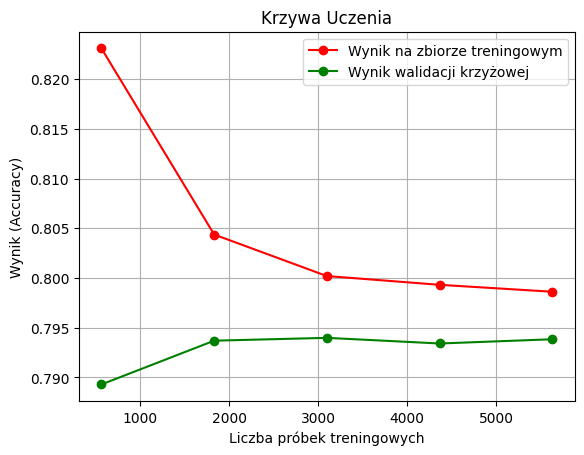

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report, accuracy_score, roc_auc_score, confusion_matrix,
    precision_recall_curve, roc_curve, auc
)
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wczytaj dane
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
if df['TotalCharges'].dtype == object:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 2. Kodowanie cech kategorycznych
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Churn']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Kodowanie targetu
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 4. Podział na X i y
X = df.drop(columns=['Churn'])
y = df['Churn']

# 5. Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Standaryzacja cech numerycznych
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7. Trening
model_lgbm = lgb.LGBMClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    boosting_type='rf',
    extra_trees=True,
    bagging_freq=1,
    verbosity=-1
)
model_lgbm.fit(X_train, y_train)

# 8. Ewaluacja
y_pred = model_lgbm.predict(X_test)
y_proba = model_lgbm.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Recall
recall_churn = tp / (tp + fn) if (tp + fn) > 0 else 0.0
print(f"Recall: {recall_churn:.4f}\n")

# Precision
precision_churn = tp / (tp + fp) if (tp + fp) > 0 else 0.0
print(f"Precision: {precision_churn:.4f}\n")

# F1-score
if (precision_churn + recall_churn) > 0:
    f1_churn = 2 * (precision_churn * recall_churn) / (precision_churn + recall_churn)
else:
    f1_churn = 0.0
print(f"F1-score: {f1_churn:.4f}\n")

# AUROC
auroc = roc_auc_score(y_test, y_proba)
print(f"AUROC: {auroc:.4f}\n")

# Wykres: Macierz pomyłek
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Przewidziane')
plt.ylabel('Rzeczywiste')
plt.title('Macierz Pomyłek (Zbiór Testowy)')
plt.show()

# Wykres: Krzywa ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Krzywa ROC (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Odsetek Fałszywie Pozytywnych (False Positive Rate)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (True Positive Rate / Czułość)')
plt.title('Krzywa ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.show()


# Wykres: Krzywa Uczenia
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes_abs, train_scores, test_scores_lc = learning_curve(
    estimator=model_lgbm,
    X=X,
    y=y,
    cv=cv_strategy,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores_lc, axis=1)

plt.figure()
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label='Wynik na zbiorze treningowym')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label='Wynik walidacji krzyżowej')
plt.xlabel('Liczba próbek treningowych')
plt.ylabel('Wynik (Accuracy)')
plt.title('Krzywa Uczenia')
plt.legend(loc='best')
plt.grid()
plt.show()

scale_pos_weight = 2.77
Accuracy: 0.7197
Recall: 0.7754
Precision: 0.4924
F1-score: 0.6023
AUROC: 0.8289


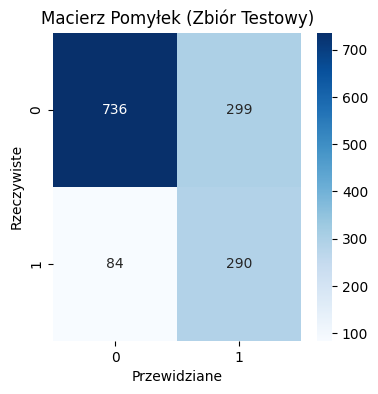

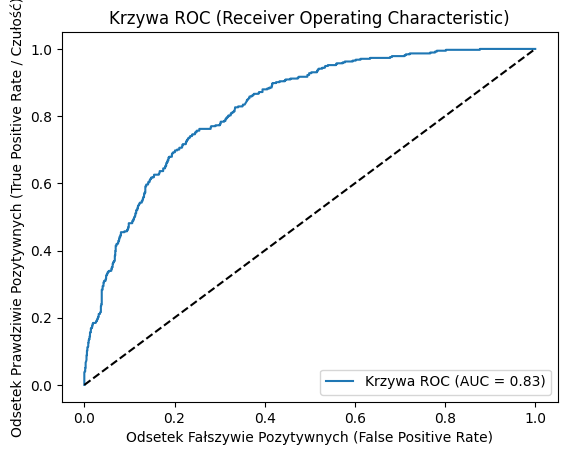

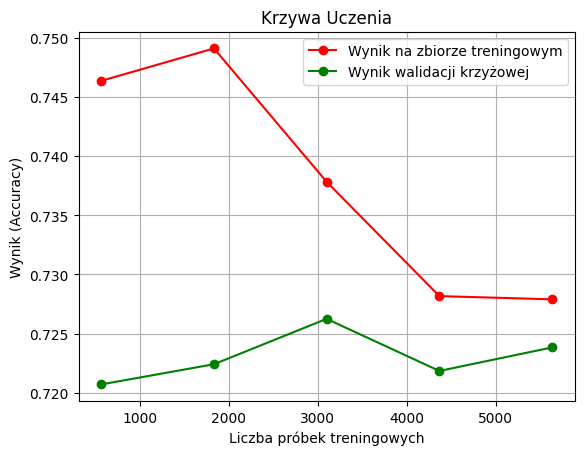

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    precision_recall_curve, roc_curve, auc
)
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wczytaj dane
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
if df['TotalCharges'].dtype == object:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 2. Kodowanie cech kategorycznych
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Churn']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Kodowanie targetu
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 4. Podział na X i y
X = df.drop(columns=['Churn'])
y = df['Churn']

# 5. Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Standaryzacja cech numerycznych
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7. scale_pos_weight
n_class_0 = sum(y_train == 0)
n_class_1 = sum(y_train == 1)
scale_pos_weight = n_class_0 / n_class_1
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

# 8. Trening
model = lgb.LGBMClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    boosting_type='rf',
    extra_trees=True,
    bagging_freq=1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    verbosity=-1
)
model.fit(X_train, y_train)

# 9. Ewaluacja
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Recall
recall_churn = tp / (tp + fn) if (tp + fn) > 0 else 0.0
print(f"Recall: {recall_churn:.4f}")

# Precision
precision_churn = tp / (tp + fp) if (tp + fp) > 0 else 0.0
print(f"Precision: {precision_churn:.4f}")

# F1-score
if (precision_churn + recall_churn) > 0:
    f1_churn = 2 * (precision_churn * recall_churn) / (precision_churn + recall_churn)
else:
    f1_churn = 0.0
print(f"F1-score: {f1_churn:.4f}")

# AUROC
auroc = roc_auc_score(y_test, y_proba)
print(f"AUROC: {auroc:.4f}")

# Wykres: Macierz pomyłek
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Przewidziane')
plt.ylabel('Rzeczywiste')
plt.title('Macierz Pomyłek (Zbiór Testowy)')
plt.show()

# Wykres: Krzywa ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Krzywa ROC (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Odsetek Fałszywie Pozytywnych (False Positive Rate)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (True Positive Rate / Czułość)')
plt.title('Krzywa ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.show()

# Wykres: Krzywa Uczenia
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes_abs, train_scores, test_scores_lc = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=cv_strategy,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores_lc, axis=1)

plt.figure()
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label='Wynik na zbiorze treningowym')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label='Wynik walidacji krzyżowej')
plt.xlabel('Liczba próbek treningowych')
plt.ylabel('Wynik (Accuracy)')
plt.title('Krzywa Uczenia')
plt.legend(loc='best')
plt.grid()
plt.show()

Przed SMOTE: [4139 1495]
Po SMOTE:    [4139 4139]
Accuracy: 0.7282
Recall: 0.7754
Precision: 0.4924
F1-score: 0.6023
AUROC: 0.8328


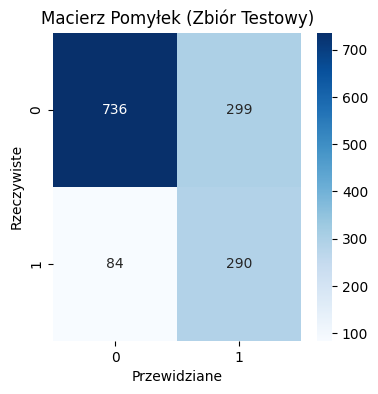

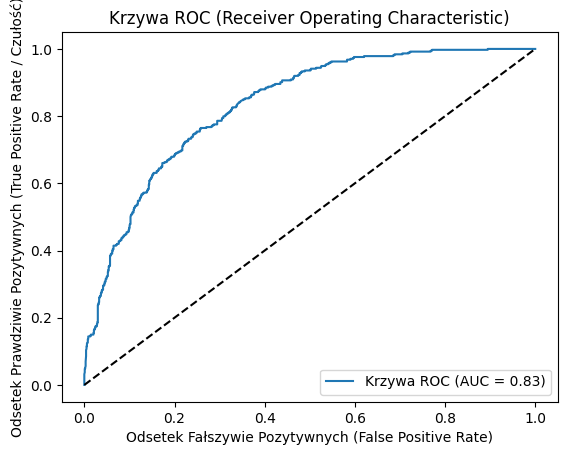

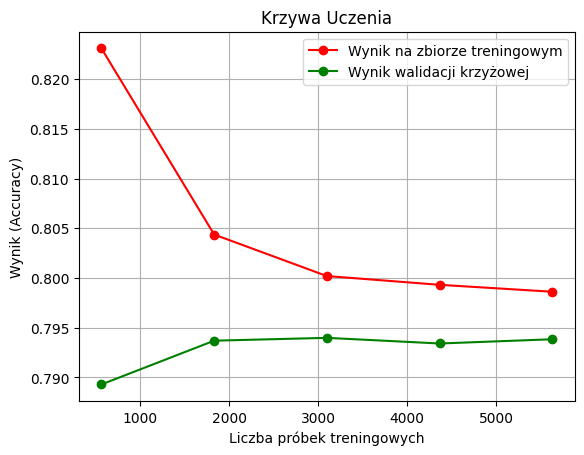

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    precision_recall_curve, roc_curve, auc
)
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wczytaj dane
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])
if df['TotalCharges'].dtype == object:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 2. Kodowanie cech kategorycznych
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'Churn']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Kodowanie targetu
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 4. Podział na X i y
X = df.drop(columns=['Churn'])
y = df['Churn']

# 5. Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Standaryzacja cech numerycznych
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7. SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Przed SMOTE:", np.bincount(y_train))
print("Po SMOTE:   ", np.bincount(y_train_sm))

# 8. Trening
model = lgb.LGBMClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    boosting_type='rf',
    extra_trees=True,
    bagging_freq=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=-1
)
model.fit(X_train_sm, y_train_sm)

# 9. Ewaluacja na test secie
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Recall
recall_churn = tp / (tp + fn) if (tp + fn) > 0 else 0.0
print(f"Recall: {recall_churn:.4f}")

# Precision
precision_churn = tp / (tp + fp) if (tp + fp) > 0 else 0.0
print(f"Precision: {precision_churn:.4f}")

# F1-score
if (precision_churn + recall_churn) > 0:
    f1_churn = 2 * (precision_churn * recall_churn) / (precision_churn + recall_churn)
else:
    f1_churn = 0.0
print(f"F1-score: {f1_churn:.4f}")

# AUROC
auroc = roc_auc_score(y_test, y_proba)
print(f"AUROC: {auroc:.4f}")


# Wykres: Macierz pomyłek (Test)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Przewidziane')
plt.ylabel('Rzeczywiste')
plt.title('Macierz Pomyłek (Zbiór Testowy)')
plt.show()

# Wykres: Krzywa ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'Krzywa ROC (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Odsetek Fałszywie Pozytywnych (False Positive Rate)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (True Positive Rate / Czułość)')
plt.title('Krzywa ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.show()

# Wykres: Krzywa Uczenia
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes_abs, train_scores, test_scores_lc = learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=cv_strategy,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores_lc, axis=1)

plt.figure()
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label='Wynik na zbiorze treningowym')
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label='Wynik walidacji krzyżowej')
plt.xlabel('Liczba próbek treningowych')
plt.ylabel('Wynik (Accuracy)')
plt.title('Krzywa Uczenia')
plt.legend(loc='best')
plt.grid()
plt.show()